In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [7]:
# reflect an existing database into a new model
Base.prepare(autoload_with=engine)
# reflect the tables

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [10]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

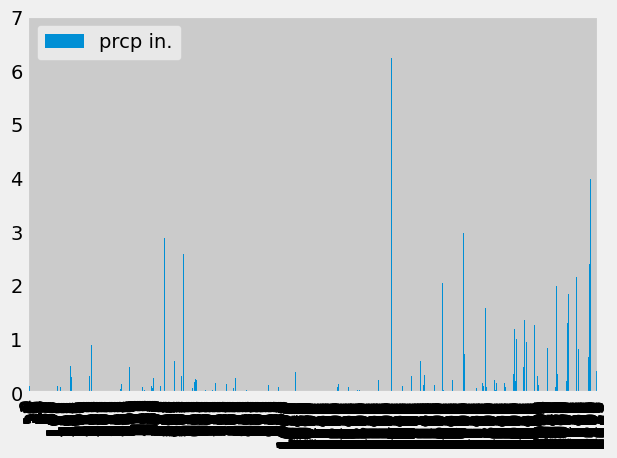

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
rain_year = session.query(measurement.date).\
    filter(measurement.date <= '2017-08-23').\
    filter(measurement.date >= '2016-08-23')

# for x in rain_year:
#     print(x)
# Perform a query to retrieve the data and precipitation scores
sel = [measurement.date,
       measurement.prcp]
precipitation = session.query(*sel).\
    filter(measurement.date <= '2017-08-23').\
    filter(measurement.date >= '2016-08-23')

# for x in precipitation:
#     print(x)


# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precipitation, columns=['date', 'prcp in.'])
df.head()

# Sort the dataframe by date
df_sorted = df.sort_values(by= 'date', ascending=True).reset_index().drop(columns= 'index')
df_sorted

# Use Pandas Plotting with Matplotlib to plot the data
# df.set_index('date', inplace=True)
df.plot.bar()
plt.tight_layout()
plt.show()

In [33]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_table = df.describe()
summary_table

,prcp in.
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [35]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(station.station).count()
print(stations)

9


In [60]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station).\
    group_by().\
    count(measurement.station)

for x in active_stations:
    print(x)

TypeError: Query.count() takes 1 positional argument but 2 were given

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [ ]:
# Close Session
session.close()